<a href="https://colab.research.google.com/github/hanghae-plus-AI/AI-1-jinalim/blob/main/chapter1_1_%EA%B8%B0%EB%B3%B8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST 실습과 똑같은 task와 모델 사용하여 시작!

**1. Test Data 준비하기**
  
  ✅ Test data는 MNIST의 train data를 load하는 코드에서 `train=False`로 두기

  ✅ Train data와 마찬가지로 test data에 대한 data loader 생성 (batch size는 동일하게 적용)

  ✅ Test data 랜덤 섞기 불필요하여 `shuffle=False`로 설정


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.ToTensor()

# Train 데이터셋 로드
trainset = torchvision.datasets.MNIST(
    root = './data',
    train = True,
    download = True,
    transform = transform
)

# Test 데이터셋 로드
testset = torchvision.datasets.MNIST(
    root = './data',
    train = False,
    download = True,
    transform = transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16047249.41it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 583952.52it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3717591.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2883822.10it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



60000
torch.Size([1, 28, 28]) 5


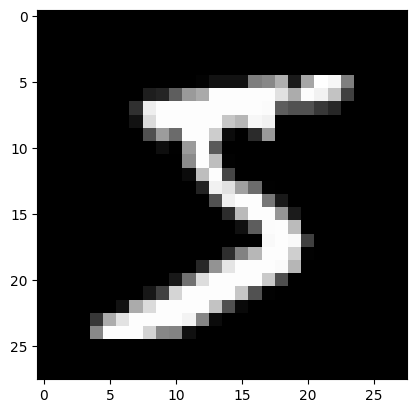

In [ ]:
#전체 data의 개수와 첫번째 data를 출력한 결과

from matplotlib import pyplot as plt

print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

In [ ]:
# SGD를 위해 dataset을 여러개의 batch로 나누기

batch_size = 64

# Train 데이터 로더 정의
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size = batch_size,
    shuffle = True
)

# Test 데이터 로더 정의
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size = batch_size,
    shuffle = False
)

dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


**2. `nn.CrossEntropyLoss` 적용하기**

> 기존 실습에서 적용한 **MSE**는 주로 회귀문제에서 사용하며, 연속적인 값을 예측 / **CrossEntropyLoss**는 분류문제에 사용하며 카테고리 예측


  ✅ Model의 최종 output의 dimension 변경

  ✅ Loss 계산부분 변경




In [ ]:
from torch import nn

class Model(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, 10)  # 10개의 클래스 출력

        self.act = nn.ReLU()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.layer3(x)  # 마지막에 활성화 함수가 없으므로 원시 출력(logits)을 반환
        return x

model = Model(28 * 28 * 1, 1024)

criterion = nn.CrossEntropyLoss() # CrossEntropyLoss 적용

from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

In [ ]:
# model을 MNIST에 학습하는 코드
n_epochs = 100

for epoch in range(n_epochs):
    total_loss = 0.
    for data in trainloader:
        model.zero_grad()
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        preds = model(inputs)
        loss = criterion(preds, labels)  # CrossEntropyLoss 사용
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch:3d} | Loss : {total_loss}")

Epoch   0 | Loss : 2128.567655801773
Epoch   1 | Loss : 2054.491209745407
Epoch   2 | Loss : 1935.0477712154388
Epoch   3 | Loss : 1733.5556044578552
Epoch   4 | Loss : 1444.4692972898483
Epoch   5 | Loss : 1142.3339027762413
Epoch   6 | Loss : 912.4827861189842
Epoch   7 | Loss : 761.5188643932343
Epoch   8 | Loss : 661.5298362374306
Epoch   9 | Loss : 591.7773237526417
Epoch  10 | Loss : 540.9213716983795
Epoch  11 | Loss : 502.25403049588203
Epoch  12 | Loss : 471.81731328368187
Epoch  13 | Loss : 447.5054068416357
Epoch  14 | Loss : 427.58541648089886
Epoch  15 | Loss : 410.88794718682766
Epoch  16 | Loss : 396.77358354628086
Epoch  17 | Loss : 384.7379209846258
Epoch  18 | Loss : 374.30871944129467
Epoch  19 | Loss : 365.1595637202263
Epoch  20 | Loss : 356.96736431121826
Epoch  21 | Loss : 349.5416002124548
Epoch  22 | Loss : 343.24429853260517
Epoch  23 | Loss : 337.08279341459274
Epoch  24 | Loss : 331.5295168310404
Epoch  25 | Loss : 326.2937582284212
Epoch  26 | Loss : 321.71

In [ ]:
idx = 0

x = trainset[idx][0][None]
x = x.to('cuda')

print(model(x))
print(trainset[idx][1])

tensor([[ 0.1856, -2.6983,  1.5400,  6.2856, -8.0986,  8.4364, -4.5844,  0.6430,
         -0.1128, -0.1917]], device='cuda:0', grad_fn=<AddmmBackward0>)
5


🔎 결과를 이해해보자!

* 이 탠서는 모델이 예측한 결과로, 위 MNIST 문제는 10개의 숫자(클래스 0~9를 분류하는 문제이므로, 이 텐서는 10개의 logits 값을 의미함
* 각각의 값는 해당 클래스에 대한 예측 점수를 의미 ( 0.1856 = 클래스 0일 것이라는 예측값 )
* 클래스 5에 대한 예측값이 8.4364로 가장 높으며, 이는 "이 이미지가 숫자 5일 가능성이 가장 높다"고 예측함을 의미

**3. epoch에 따른 model의 train 과 test data에 대한 정확도 plot하기**
  
  ✅ 매 epoch가 끝난 뒤의 model의 trainloader와 testloader에 대한 정확도를 각각 list로 저장

  ✅ Epoch에 따른 train과 test data에 대한 model의 정확도를 다음 코드를 사용하여 plot하기

In [ ]:
n_epochs = 100
batch_size = 256
lr = 0.001

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

train_acc_list = []
test_acc_list = []

for epoch in range(n_epochs):
    total_loss = 0.


    model.train()
    for data in trainloader:
        model.zero_grad()
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        preds = model(inputs)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # 에폭 끝난 후 정확도 계산
    model.eval()
    train_acc = accuracy(model, trainloader)  # Train 데이터에 대한 정확도
    test_acc = accuracy(model, testloader)    # Test 데이터에 대한 정확도

    # 정확도 저장
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    # 학습 상태 출력
    print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")


Epoch   0 | Loss: 180.7794 | Train Accuracy: 0.9459 | Test Accuracy: 0.9438
Epoch   1 | Loss: 179.7289 | Train Accuracy: 0.9465 | Test Accuracy: 0.9434
Epoch   2 | Loss: 178.6329 | Train Accuracy: 0.9467 | Test Accuracy: 0.9447
Epoch   3 | Loss: 177.4279 | Train Accuracy: 0.9469 | Test Accuracy: 0.9447
Epoch   4 | Loss: 176.4176 | Train Accuracy: 0.9474 | Test Accuracy: 0.9444
Epoch   5 | Loss: 175.1809 | Train Accuracy: 0.9477 | Test Accuracy: 0.9449
Epoch   6 | Loss: 174.0830 | Train Accuracy: 0.9481 | Test Accuracy: 0.9450
Epoch   7 | Loss: 173.1122 | Train Accuracy: 0.9486 | Test Accuracy: 0.9457
Epoch   8 | Loss: 172.1481 | Train Accuracy: 0.9488 | Test Accuracy: 0.9455
Epoch   9 | Loss: 170.8985 | Train Accuracy: 0.9487 | Test Accuracy: 0.9463
Epoch  10 | Loss: 169.9591 | Train Accuracy: 0.9495 | Test Accuracy: 0.9463
Epoch  11 | Loss: 168.8693 | Train Accuracy: 0.9497 | Test Accuracy: 0.9466
Epoch  12 | Loss: 167.8488 | Train Accuracy: 0.9499 | Test Accuracy: 0.9470
Epoch  13 | 

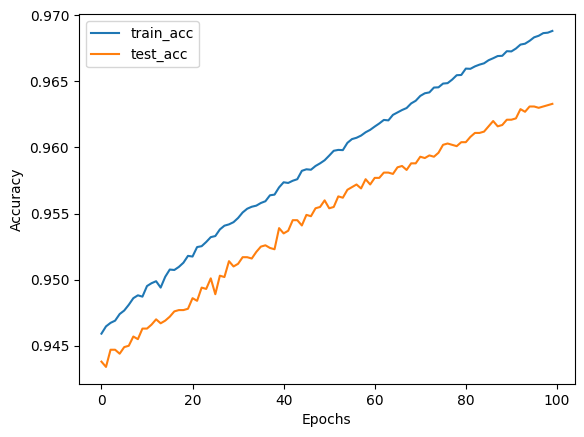

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_acc(train_acc_list, test_acc_list, label1='train_acc', label2='test_acc'):
    x = np.arange(len(train_acc_list))

    plt.plot(x, train_acc_list, label=label1)
    plt.plot(x, test_acc_list, label=label2)
    plt.legend()
    plt.xlabel('Epochs')  # X축 레이블 추가
    plt.ylabel('Accuracy')  # Y축 레이블 추가
    plt.show()

%matplotlib inline

plot_acc(train_acc_list, test_acc_list)

In [ ]:
print(train_acc_list)

[0.9459166666666666, 0.9464666666666667, 0.9467333333333333, 0.9469, 0.9474, 0.9476666666666667, 0.9481, 0.9486, 0.9488166666666666, 0.9487166666666667, 0.9495166666666667, 0.9497333333333333, 0.9498833333333333, 0.9494, 0.9502166666666667, 0.9507666666666666, 0.9507333333333333, 0.9509666666666666, 0.9512833333333334, 0.9518, 0.95175, 0.9524666666666667, 0.9525333333333333, 0.95285, 0.9532166666666667, 0.9533, 0.9538, 0.9540833333333333, 0.9541833333333334, 0.95435, 0.9546666666666667, 0.9550833333333333, 0.9553666666666667, 0.9555166666666667, 0.9556, 0.9558, 0.9559333333333333, 0.9563833333333334, 0.9564333333333334, 0.9569833333333333, 0.9573666666666667, 0.9573166666666667, 0.9574833333333334, 0.9576, 0.9582333333333334, 0.95835, 0.9583166666666667, 0.9586, 0.9588, 0.9590333333333333, 0.9593833333333334, 0.95975, 0.9598166666666667, 0.9598, 0.96035, 0.9606333333333333, 0.9607333333333333, 0.9609, 0.96115, 0.9613333333333334, 0.9615833333333333, 0.9618166666666667, 0.96208333333333

In [ ]:
print(test_acc_list)

[0.9438, 0.9434, 0.9447, 0.9447, 0.9444, 0.9449, 0.945, 0.9457, 0.9455, 0.9463, 0.9463, 0.9466, 0.947, 0.9467, 0.9469, 0.9472, 0.9476, 0.9477, 0.9477, 0.9478, 0.9486, 0.9484, 0.9494, 0.9493, 0.9501, 0.9489, 0.9503, 0.9502, 0.9514, 0.951, 0.9512, 0.9517, 0.9517, 0.9516, 0.9521, 0.9525, 0.9526, 0.9524, 0.9523, 0.9539, 0.9535, 0.9537, 0.9545, 0.9545, 0.9541, 0.9549, 0.9548, 0.9554, 0.9555, 0.956, 0.9554, 0.9555, 0.9563, 0.9562, 0.9568, 0.957, 0.9572, 0.9569, 0.9576, 0.9572, 0.9577, 0.9577, 0.9581, 0.9581, 0.958, 0.9585, 0.9586, 0.9583, 0.9588, 0.9588, 0.9593, 0.9592, 0.9594, 0.9593, 0.9596, 0.9602, 0.9603, 0.9602, 0.9601, 0.9604, 0.9604, 0.9608, 0.9611, 0.9611, 0.9612, 0.9616, 0.962, 0.9616, 0.9617, 0.9621, 0.9621, 0.9622, 0.9629, 0.9627, 0.9631, 0.9631, 0.963, 0.9631, 0.9632, 0.9633]


🔎 결과를 이해해보자!

* train data의 정확도는 0.945 ~ 0.968 사이에서 점진적으로 상승 / test data는 0.943 ~ 0.963까지 상승하는 추세
* 두 정확도 간의 차이가 0.01 이내에서 유지되고 있다. 즉 train data와 test data의 정확도 차이가 크지 않아 overfitting 되지는 않은 것으로 볼 수 있다.
* train data와 test data 모두 정확도가 94~96% 이상을 기록하고 있어, 모델이 충분히 학습되었다고 볼 수 있다.